In [1]:
!pip install gymnasium

In [2]:
import gymnasium as gym
import numpy as np
import random
import time

In [3]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [4]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [23]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [24]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [25]:
q_table

array([[0.58061611, 0.54535836, 0.53196262, 0.52921571],
       [0.35277927, 0.20120077, 0.26860668, 0.51812966],
       [0.3975519 , 0.40853267, 0.38497976, 0.48857754],
       [0.25756202, 0.21917687, 0.15116785, 0.4731224 ],
       [0.59407428, 0.50048159, 0.38475478, 0.30299255],
       [0.        , 0.        , 0.        , 0.        ],
       [0.19825652, 0.15806878, 0.35337444, 0.1318963 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.38391492, 0.45331696, 0.47693757, 0.61980407],
       [0.54385623, 0.6653813 , 0.39257138, 0.49863786],
       [0.67026049, 0.4166873 , 0.43763129, 0.35737977],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.4504588 , 0.6307107 , 0.75752423, 0.4370029 ],
       [0.76211461, 0.90148706, 0.76769002, 0.77824671],
       [0.        , 0.        , 0.        , 0.        ]])

In [26]:
sum(rewards_all)

13049.0

In [27]:
sum(rewards_all[0:1000])

232.0

In [28]:
sum(rewards_all[1000:2000])

631.0

In [29]:
sum(rewards_all[2000:3000])

698.0

In [30]:
sum(rewards_all[9000:10000])

684.0

In [31]:
sum(rewards_all[19000:20000])

701.0

In [32]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [33]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [34]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [35]:
play_multiple_times(env, q_table, 1000)

Number of successes: 756/1000
Average number of steps: 38.157407407407405


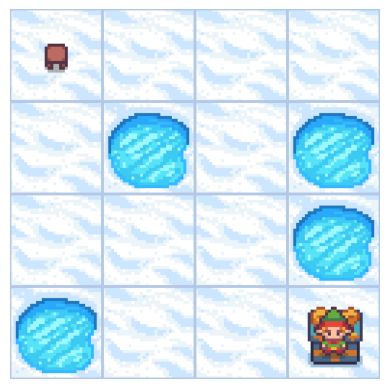

(1.0, 33)

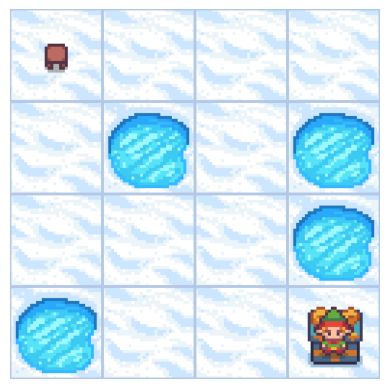

In [19]:
play(env, q_table, render=True)

In [20]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [21]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

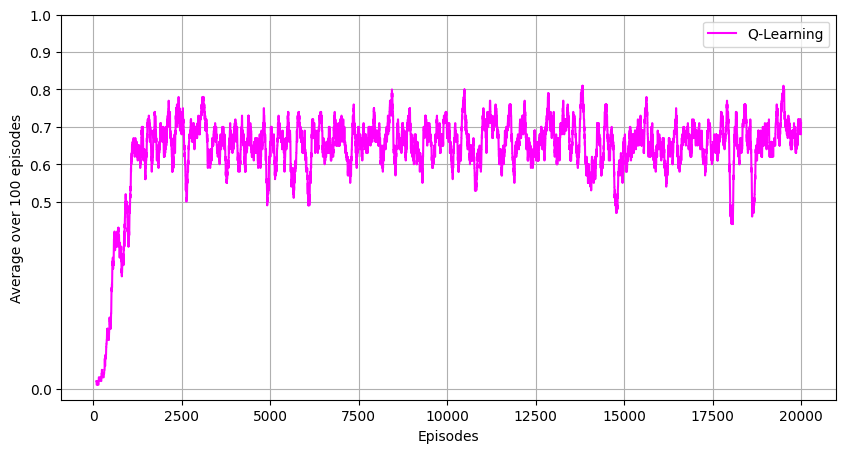

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()